# 🌆 Urban Heat Island & Environmental Impact Analysis  
### Modeling Heat Intensity, Air Quality, and Health Risks

## 📌 Overview  
This project analyzes a curated dataset of 500 urban locations across various regions, focusing on the relationship between **urban temperature**, **land use**, **energy consumption**, **air quality**, and **public health outcomes**. The goal is to uncover the key drivers of Urban Heat Island (UHI) effects and build predictive models for environmental risk and city-level health impacts.

---

## 📈 Exploratory Data Analysis (EDA)

- 🌍 **Geospatial distribution** of urban temperatures and elevation  
- 🌡️ **Temperature patterns** across different land cover types  
- 🌳 **Greenness ratio** vs. urban temperature  
- 🏙️ **Energy consumption & population density** vs. heat intensity  
- 💨 **Air quality index (AQI)** and its correlation with temperature  
- ⚕️ **Mortality rate** as health impact vs. urban climate variables  

---

## 📚 Urban Climate & Public Health Insights

- 🔥 Cities with low greenness and high energy usage tend to have higher temperatures  
- 🌿 Green space coverage significantly reduces UHI intensity  
- 💨 Poor air quality correlates with both higher temperatures and higher mortality rates  
- 📉 Elevated humidity and wind speed may mitigate temperature levels in dense cities  

---

## 🧠 Machine Learning Modeling

### 🎯 Goal 1: Predict Urban Temperature (°C)  
**Features Used:**
- Elevation (m)  
- Population Density  
- Land Cover (encoded)  
- Energy Consumption  
- Urban Greenness (%)  
- AQI, Humidity, Wind Speed  

**Preprocessing Steps:**
- One-hot encode `Land Cover`  
- Normalize numeric features  
- Train-Test Split (80/20)  

**Modeling Approaches:**
- Linear Regression  
- Random Forest Regressor  
- Feature Importance Analysis  

---

### 🎯 Goal 2 (Optional): Classify Cities into Temperature Bands: `Low`, `Moderate`, `High`  
**Classification Models:**
- Decision Tree  
- Logistic Regression  
- Random Forest Classifier  

---

## 📌 Key Insights

- 💡 Population density and energy usage are top predictors of elevated temperatures  
- 💡 Green space improves air quality and reduces mortality impact  
- 💡 UHI severity is highest in cities with low wind speed, low vegetation, and high energy use  
- 💡 Land cover is a critical variable—urban and water regions show distinct temperature profiles  

---

## 🔧 Tools Used  
- **Python** (Pandas, NumPy, Scikit-learn)  
- **Visualization:** Matplotlib, Seaborn, Plotly  
- **Modeling:** Regression & Classification  
- **Environment:** Jupyter Notebook  

---

## 📎 Dataset Info  
- **Observations:** 500 cities  
- **Features:**  
  - Location (Latitude, Longitude, Elevation)  
  - Environmental: Temperature, Rainfall, Humidity, Wind  
  - Socioeconomic: Energy Consumption, Population, GDP  
  - Public Health: AQI, Mortality Rate  
  - Land Cover Types: Green Space, Water, Urban  
- **Source:** Synthetic urban environmental dataset (https://www.kaggle.com/datasets/atharvasoundankar/urban-heat-island-uhi-monitoring-dataset)

---

## 🧑‍💻 Author  
**Hilda Adina Rahmi** – Aspiring Data Scientist with a passion for urban sustainability, environmental health analytics, and geospatial data storytelling.


In [45]:
# 📦 Load the necessary libraries for analyzing Urban Heat Island & Environmental Impact dataset

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import MarkerCluster
import matplotlib.dates as mdates

# Geospatial data processing
import geopandas as gpd

# Machine Learning & Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# System & warnings
import warnings
warnings.filterwarnings('ignore')

# 🧠 Set visual style for analysis
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [46]:
# Load your dataset
df = pd.read_csv("urban_heat_island_dataset.csv")

In [47]:
# Show basic info and first few rows
df_info = df.info()
df_head = df.head()

df_shape = df.shape
df_columns = df.columns.tolist()

df_shape, df_columns, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   City Name                            500 non-null    object 
 1   Latitude                             500 non-null    float64
 2   Longitude                            500 non-null    float64
 3   Elevation (m)                        500 non-null    float64
 4   Temperature (°C)                     500 non-null    float64
 5   Land Cover                           500 non-null    object 
 6   Population Density (people/km²)      500 non-null    int64  
 7   Energy Consumption (kWh)             500 non-null    float64
 8   Air Quality Index (AQI)              500 non-null    int64  
 9   Urban Greenness Ratio (%)            500 non-null    float64
 10  Health Impact (Mortality Rate/100k)  500 non-null    float64
 11  Wind Speed (km/h)               

((500, 15),
 ['City Name',
  'Latitude',
  'Longitude',
  'Elevation (m)',
  'Temperature (°C)',
  'Land Cover',
  'Population Density (people/km²)',
  'Energy Consumption (kWh)',
  'Air Quality Index (AQI)',
  'Urban Greenness Ratio (%)',
  'Health Impact (Mortality Rate/100k)',
  'Wind Speed (km/h)',
  'Humidity (%)',
  'Annual Rainfall (mm)',
  'GDP per Capita (USD)'],
   City Name   Latitude   Longitude  Elevation (m)  Temperature (°C)  \
 0    City_1 -22.582779   71.338217     833.098180         22.977045   
 1    City_2  81.128575   12.994692    2438.554263         21.979547   
 2    City_3  41.758910  -68.570058    3928.256261         10.641052   
 3    City_4  17.758527  112.966207    3295.011989         18.531196   
 4    City_5 -61.916645   66.503222    3629.525165         19.504890   
 
     Land Cover  Population Density (people/km²)  Energy Consumption (kWh)  \
 0        Water                             2544               7160.489181   
 1  Green Space                    

In [48]:
# Checking for missing values and summarizing the statistics of the dataset
missing_values = df.isnull().sum()
summary_statistics = df.describe(include='all')

# Displaying the missing values and summary statistics
print(missing_values)
print(summary_statistics)

City Name                              0
Latitude                               0
Longitude                              0
Elevation (m)                          0
Temperature (°C)                       0
Land Cover                             0
Population Density (people/km²)        0
Energy Consumption (kWh)               0
Air Quality Index (AQI)                0
Urban Greenness Ratio (%)              0
Health Impact (Mortality Rate/100k)    0
Wind Speed (km/h)                      0
Humidity (%)                           0
Annual Rainfall (mm)                   0
GDP per Capita (USD)                   0
dtype: int64
       City Name    Latitude   Longitude  Elevation (m)  Temperature (°C)  \
count        500  500.000000  500.000000     500.000000        500.000000   
unique       500         NaN         NaN            NaN               NaN   
top     City_500         NaN         NaN            NaN               NaN   
freq           1         NaN         NaN            NaN         

# **Exploratory Data Analysis (EDA)**

In [49]:
import plotly.express as px
fig = px.scatter_mapbox(
    df,
    lat="Latitude",
    lon="Longitude",
    color="Temperature (°C)",  # Ensure this matches the column name
    size="Elevation (m)",       # Use the correct column name for elevation
    color_continuous_scale="thermal",
    size_max=15,
    zoom=3,
    mapbox_style="carto-positron",
    title="Geospatial Distribution of Urban Temperatures and Elevation"
)
fig.show()

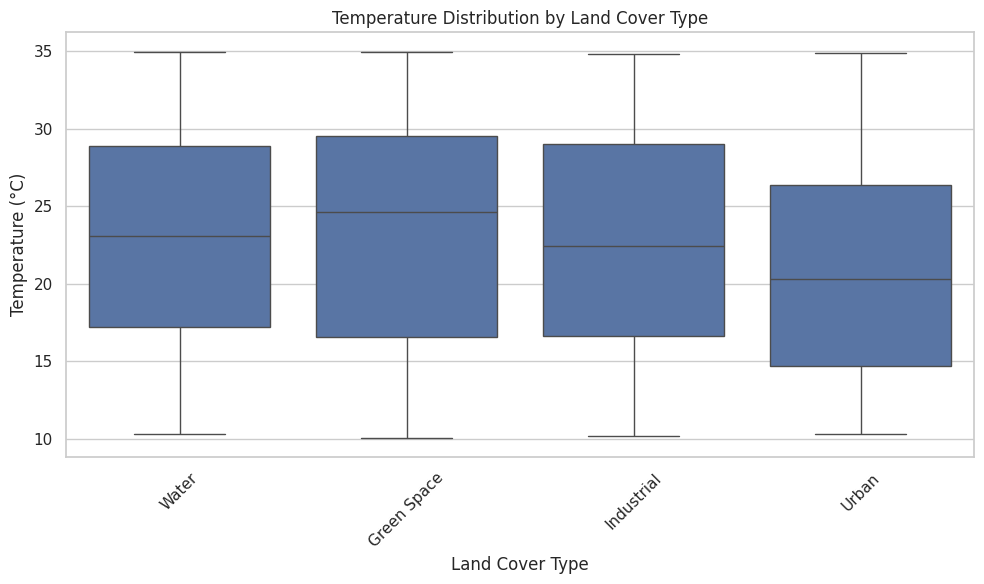

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Land Cover", y="Temperature (°C)", data=df)
plt.title("Temperature Distribution by Land Cover Type")
plt.ylabel("Temperature (°C)")
plt.xlabel("Land Cover Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

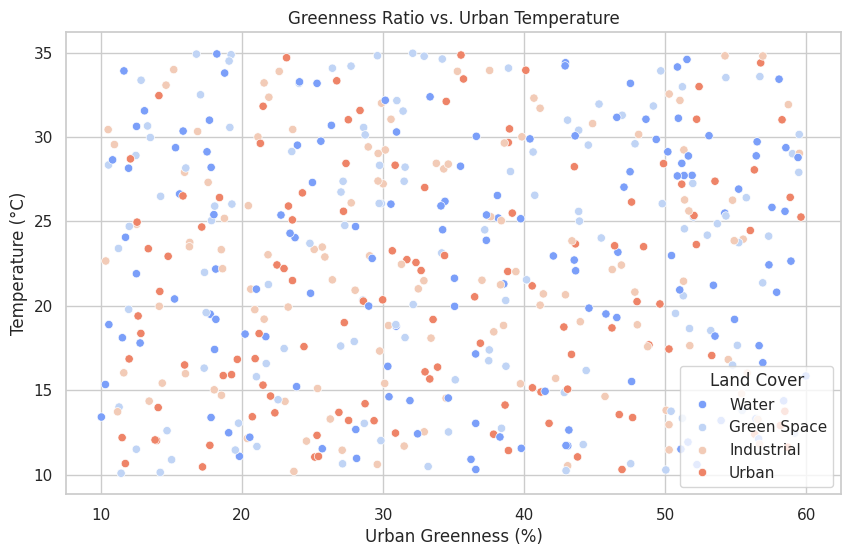

In [51]:
sns.scatterplot(
    x="Urban Greenness Ratio (%)",
    y="Temperature (°C)",
    data=df,
    hue="Land Cover",
    palette="coolwarm"
)
plt.title("Greenness Ratio vs. Urban Temperature")
plt.xlabel("Urban Greenness (%)")
plt.ylabel("Temperature (°C)")
plt.show()

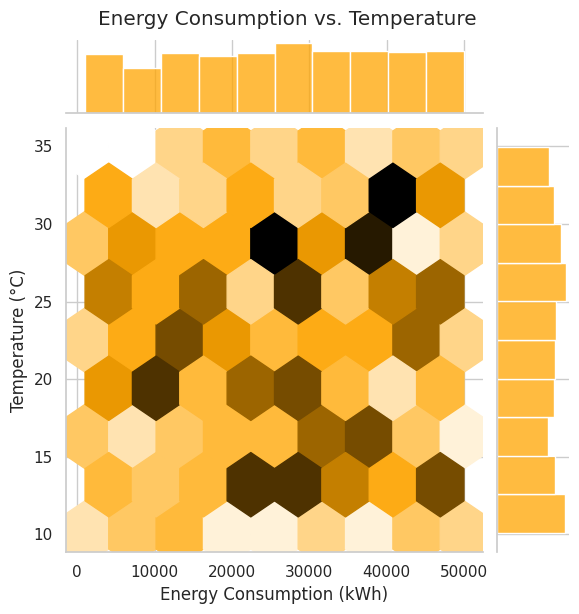

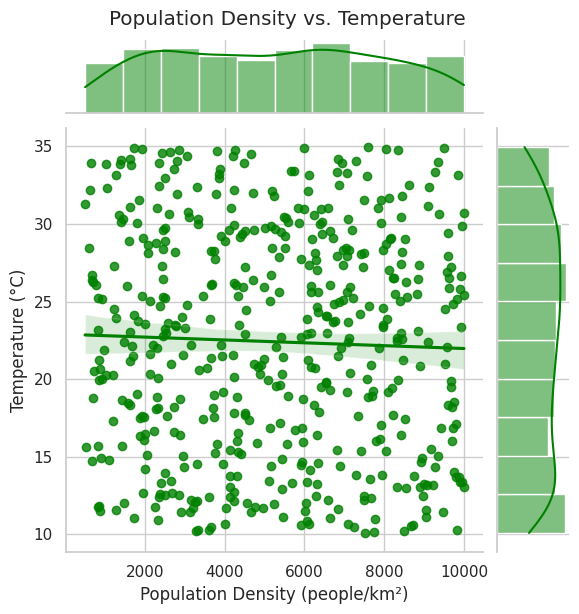

In [52]:
sns.jointplot(
    x="Energy Consumption (kWh)",
    y="Temperature (°C)",
    data=df,
    kind="hex",
    color="orange"
)
plt.suptitle("Energy Consumption vs. Temperature", y=1.02)
plt.show()

sns.jointplot(
    x="Population Density (people/km²)",
    y="Temperature (°C)",
    data=df,
    kind="reg",
    color="green"
)
plt.suptitle("Population Density vs. Temperature", y=1.02)
plt.show()

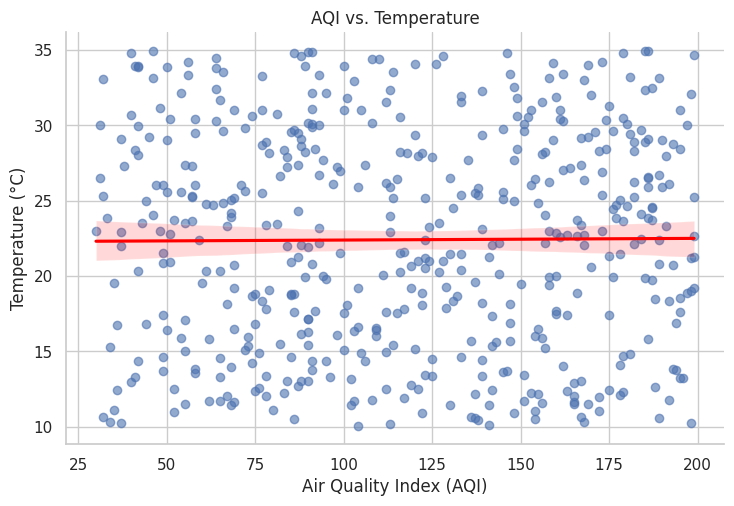

In [53]:
sns.lmplot(
    x="Air Quality Index (AQI)",
    y="Temperature (°C)",
    data=df,
    aspect=1.5,
    scatter_kws={'alpha':0.6},
    line_kws={"color": "red"}
)
plt.title("AQI vs. Temperature")
plt.xlabel("Air Quality Index (AQI)")
plt.ylabel("Temperature (°C)")
plt.show()

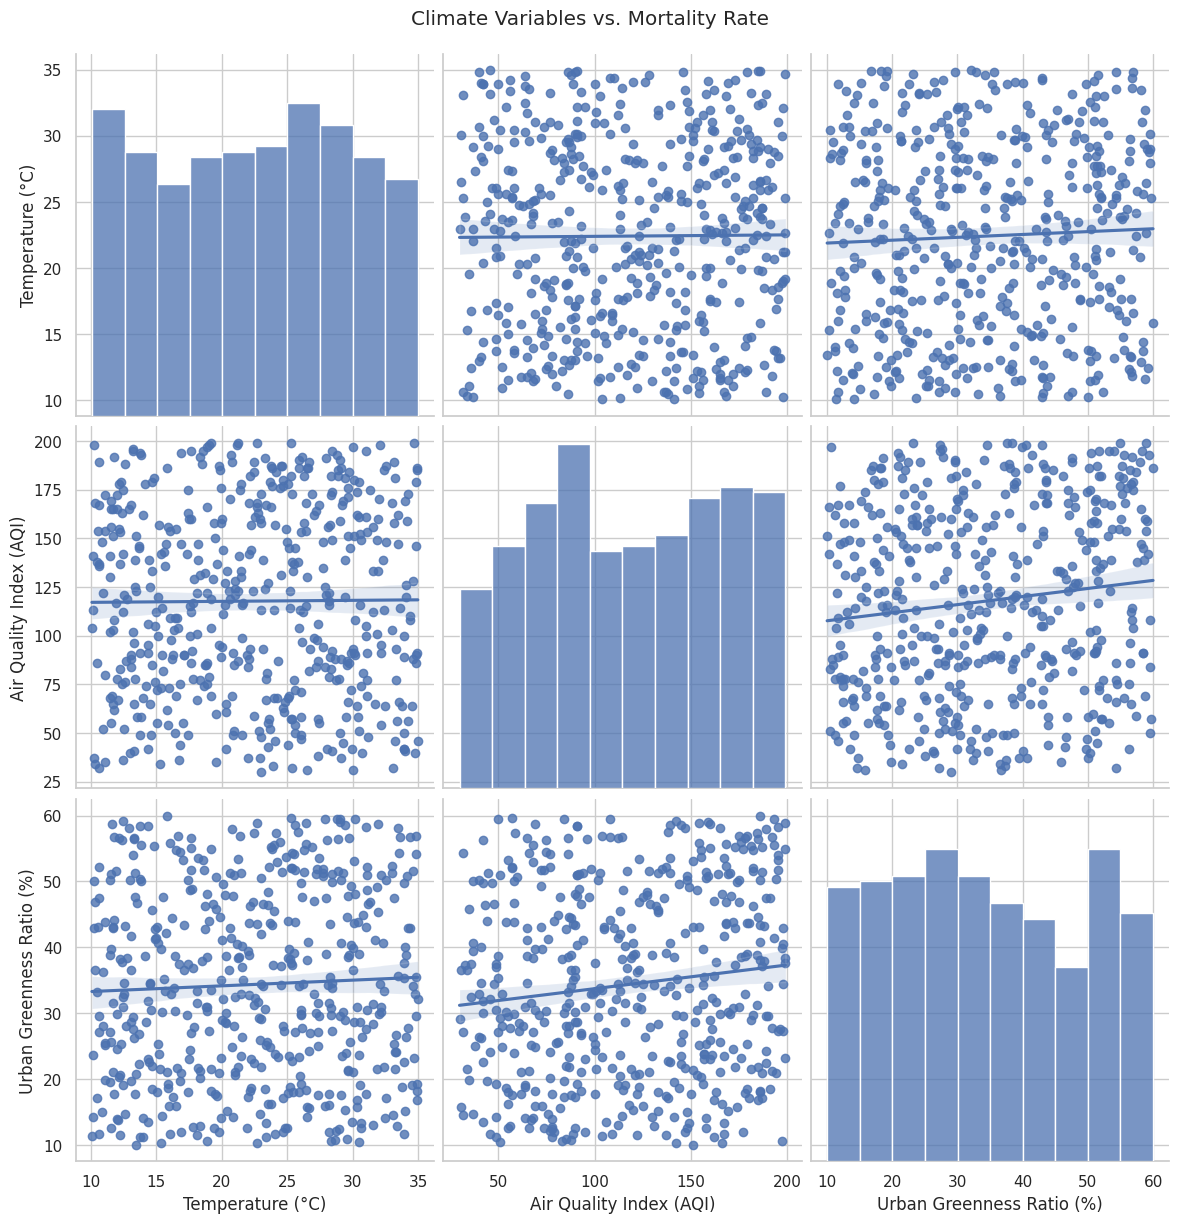

In [54]:
sns.pairplot(
    df,
    vars=["Temperature (°C)", "Air Quality Index (AQI)", "Urban Greenness Ratio (%)"],
    y_vars=["Health Impact (Mortality Rate/100k)"],
    kind="reg",
    height=4
)
plt.suptitle("Climate Variables vs. Mortality Rate", y=1.02)
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# One-hot encode categorical feature
df_ml = df[['Elevation (m)', 'Population Density (people/km²)', 'Land Cover',
            'Energy Consumption (kWh)', 'Urban Greenness Ratio (%)',
            'Air Quality Index (AQI)', 'Humidity (%)', 'Wind Speed (km/h)', 'Temperature (°C)']].dropna()

df_ml = pd.get_dummies(df_ml, columns=['Land Cover'], drop_first=True)

X = df_ml.drop(columns='Temperature (°C)')
y = df_ml['Temperature (°C)']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Linear Regression:")
print("  MAE:", mean_absolute_error(y_test, y_pred_lr))
print("  RMSE:", mean_squared_error(y_test, y_pred_lr) ** 0.5)
print("  R²:", r2_score(y_test, y_pred_lr))

print("\nRandom Forest:")
print("  MAE:", mean_absolute_error(y_test, y_pred_rf))
print("  RMSE:", mean_squared_error(y_test, y_pred_rf) ** 0.5)
print("  R²:", r2_score(y_test, y_pred_rf))

Linear Regression:
  MAE: 6.161421611829379
  RMSE: 7.246191643196992
  R²: -0.09408405451715462

Random Forest:
  MAE: 6.294737359465508
  RMSE: 7.370131067478514
  R²: -0.13183072540114638


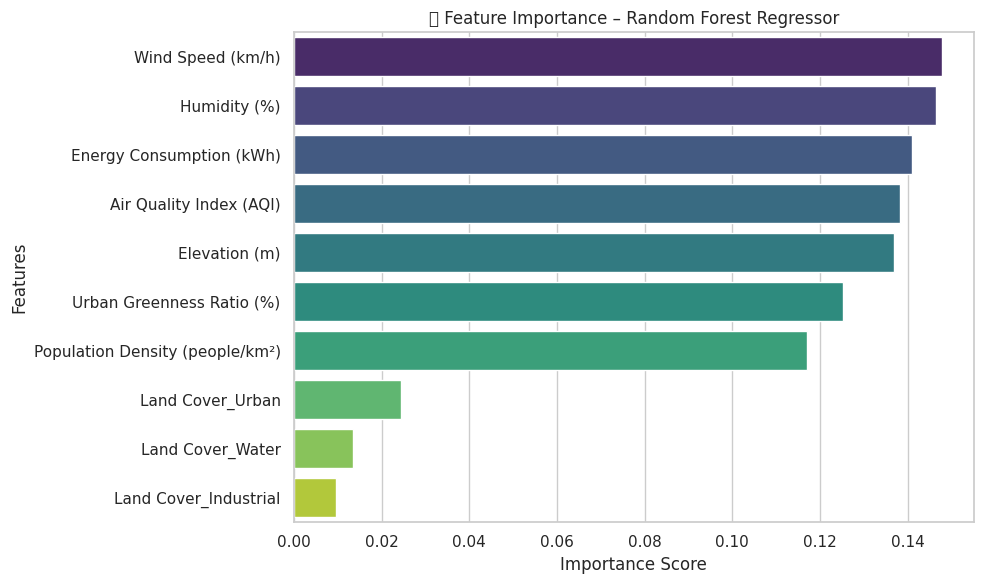

In [56]:
# Get feature importance from the Random Forest model
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('🔍 Feature Importance – Random Forest Regressor')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import joblib

# Assuming df_ml is already defined and contains your data

# 1. Create temperature category column
def classify_temperature(temp):
    if temp < 15:
        return 'Low'
    elif 15 <= temp < 25:
        return 'Moderate'
    else:
        return 'High'

df_ml['Temp_Band'] = df_ml['Temperature (°C)'].apply(classify_temperature)

# 2. Classification target
y_class = df_ml['Temp_Band']
X_class = df_ml.drop(columns=['Temperature (°C)', 'Temp_Band'])

# 3. One-hot encode categorical features
X_class = pd.get_dummies(X_class, drop_first=True)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# 5. Model training
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Cross-validation
    scores = cross_val_score(model, X_class, y_class, cv=5)
    print("Cross-Validation Accuracy:", scores.mean())

    # Save the model
    joblib.dump(model, f'{name.lower().replace(" ", "_")}_classifier.pkl')


Decision Tree:
Accuracy: 0.34
Confusion Matrix:
 [[15  4 17]
 [10  3 11]
 [13 11 16]]
Classification Report:
               precision    recall  f1-score   support

        High       0.39      0.42      0.41        36
         Low       0.17      0.12      0.14        24
    Moderate       0.36      0.40      0.38        40

    accuracy                           0.34       100
   macro avg       0.31      0.31      0.31       100
weighted avg       0.33      0.34      0.33       100

Cross-Validation Accuracy: 0.346

Logistic Regression:
Accuracy: 0.3
Confusion Matrix:
 [[22  0 14]
 [18  0  6]
 [32  0  8]]
Classification Report:
               precision    recall  f1-score   support

        High       0.31      0.61      0.41        36
         Low       0.00      0.00      0.00        24
    Moderate       0.29      0.20      0.24        40

    accuracy                           0.30       100
   macro avg       0.20      0.27      0.21       100
weighted avg       0.22      0.30

In [59]:
!pip install streamlit

In [61]:
import os
print(os.getcwd())

/content


In [62]:
     from sklearn.ensemble import RandomForestClassifier
     import joblib

     # Assuming you have a trained model
     model = RandomForestClassifier()  # Replace with your trained model
     # Train your model here...

     # Save the model
     joblib.dump(model, 'random_forest_classifier.pkl')


['random_forest_classifier.pkl']

In [63]:
import streamlit as st
import pandas as pd
import joblib

# Load trained model and scaler
try:
    model = joblib.load('random_forest_classifier.pkl')
    scaler = joblib.load('scaler.pkl')
except FileNotFoundError as e:
    st.error(f"Error loading model or scaler: {e}")
    st.stop()

# Title
st.title("City Temperature Band Classifier")

# Input
st.sidebar.header("Input Features")
elevation = st.sidebar.slider("Elevation (m)", 0, 5000, 100)
population = st.sidebar.slider("Population Density (people/km²)", 0, 10000, 500)
energy = st.sidebar.slider("Energy Consumption (kWh)", 0, 50000, 10000)
greenness = st.sidebar.slider("Urban Greenness Ratio (%)", 0.0, 100.0, 30.0)
aqi = st.sidebar.slider("Air Quality Index (AQI)", 0, 500, 100)
humidity = st.sidebar.slider("Humidity (%)", 0.0, 100.0, 50.0)
wind = st.sidebar.slider("Wind Speed (km/h)", 0.0, 50.0, 10.0)

# Categorical
land_cover = st.sidebar.selectbox("Land Cover", ['Green Space', 'Urban', 'Water', 'Industrial'])

# Prepare input
input_dict = {
    'Elevation (m)': elevation,
    'Population Density (people/km²)': population,
    'Energy Consumption (kWh)': energy,
    'Urban Greenness Ratio (%)': greenness,
    'Air Quality Index (AQI)': aqi,
    'Humidity (%)': humidity,
    'Wind Speed (km/h)': wind,
    'Land Cover_Urban': 1 if land_cover == 'Urban' else 0,
    'Land Cover_Water': 1 if land_cover == 'Water' else 0,
    'Land Cover_Industrial': 1 if land_cover == 'Industrial' else 0,
    'Land Cover_Green Space': 1 if land_cover == 'Green Space' else 0
}

input_df = pd.DataFrame([input_dict])

# Scale and predict
try:
    scaled_input = scaler.transform(input_df)
    prediction = model.predict(scaled_input)[0]
except ValueError as e:
    st.error(f"Error during prediction: {e}")
    st.stop()
except Exception as e:
    st.error(f"An unexpected error occurred: {e}")
    st.stop()

# Output
if 'prediction' in locals():  # Check if prediction is defined
    st.subheader("Predicted Temperature Band:")
    st.success(prediction)
else:
    st.error("Prediction could not be made.")

2025-05-06 09:05:48.385 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 09:05:48.388 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 09:05:48.392 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 09:05:48.395 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 09:05:48.398 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 09:05:48.400 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 09:05:48.405 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 09:05:48.409 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [64]:
joblib.dump(model, 'random_forest_classifier.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import joblib

# Load example dataset (replace with your own data)
data = load_iris()
X, y = data.data, data.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'random_forest_classifier.pkl')

print("Model saved as 'random_forest_classifier.pkl'")

Model saved as 'random_forest_classifier.pkl'


In [68]:
import joblib
model = joblib.load('random_forest_classifier.pkl')